In [3]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import time
import dateutil
import sklearn.metrics as sm
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import accuracy_score

In [4]:
data = pd.read_csv("KAG_energydata_complete.csv")

In [5]:
data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
#To check null values
data.isnull().sum().sort_values(ascending=False)

date           0
T7             0
rv1            0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
RH_6           0
Appliances     0
T6             0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
rv2            0
dtype: int64

In [7]:
#Check unique values in each features
data.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [8]:
#Check the statistical analysis of the dataset
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [9]:
#To check the datatype of all the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [10]:
# starting of EDA
# Data Visualization part

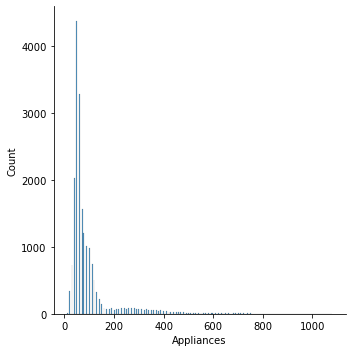

In [11]:
sns.displot(data["Appliances"])

<AxesSubplot:xlabel='Appliances'>

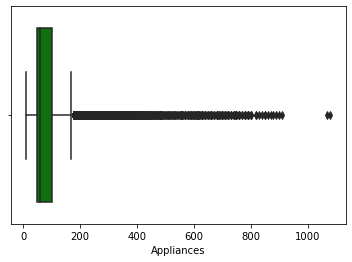

In [12]:
#2-Clearly there will be outliers in appliances part as it has a skew graph so we will use box plot to visualize that
sns.boxplot(x= data["Appliances"], color="green")

In [13]:
# #so in above box plot we can see the outliers
# filter = data["Appliances"].values < 125
# data_outlier_rem = data[filter]
# data_outlier_rem

In [14]:
#sns.boxplot(x= data_outlier_rem["Appliances"], color="green")

In [15]:
#data = data_outlier_rem

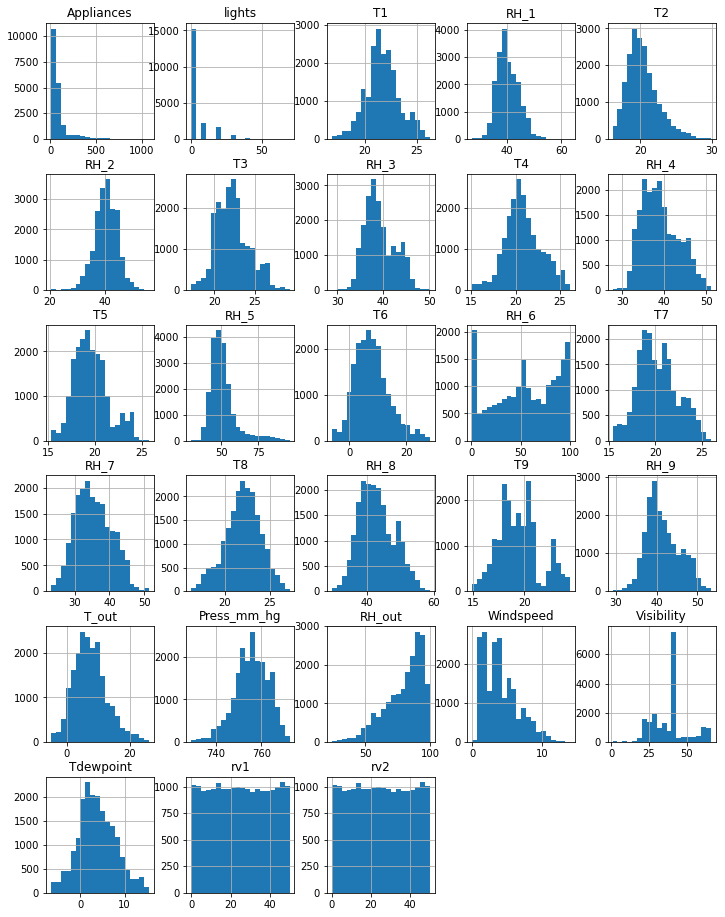

In [16]:
# Histogram of all the features to understand the distribution
data.hist(bins = 20 , figsize= (12,16)) ;

In [17]:
# Observations based on distribution plot
# 1. All humidity values except RH_6 and RH_out follow a Normal distribution.
# 2. Similarly, all temperature readings follow a Normal distribution except for T9.
# 3. Out of the remaining columns, we can see that Visibility, Windspeed and Appliances are skewed.
# 4. The random variables rv1 and rv2 have more or less the same values for all the recordings.
# 5. The output variable Appliances has most values less than 200Wh, showing that high energy consumption cases are very low.
# 6. No column has a distribution like the target variable Appliances.
# Hence, there are no feature independent feature with a linear relationship with the target.

In [18]:
#To include time from date column for analysis of appliances energy prediction from time and day point of view
data["exact_date"]=data['date'].str.split(' ').str[0]

data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.Appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["Appliances"].mean()).get, data.hours))

data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,161.352657
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,161.352657
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,161.352657
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,161.352657
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,161.352657


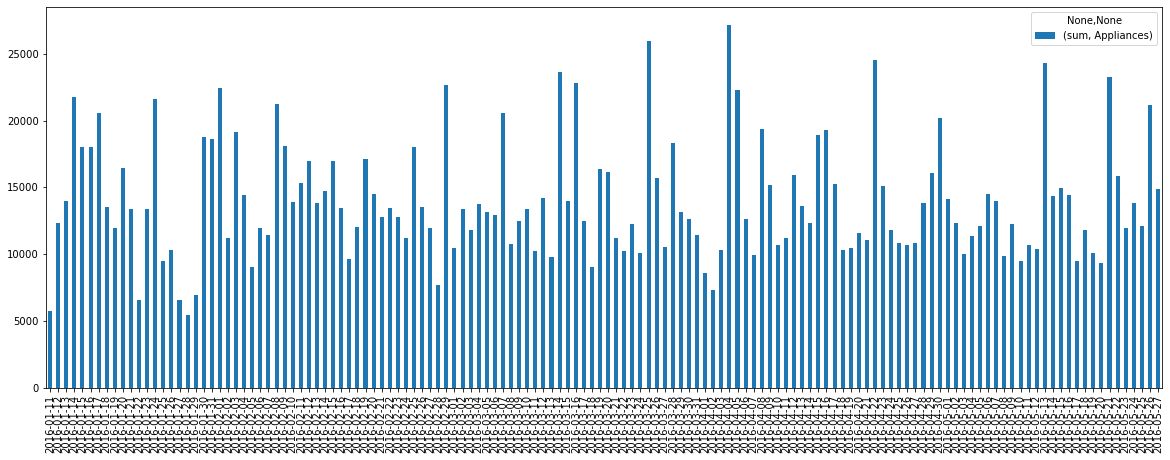

In [19]:
# Perform analysis & model development
# Day wise Electricity consumption
dates=data["exact_date"].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="Appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

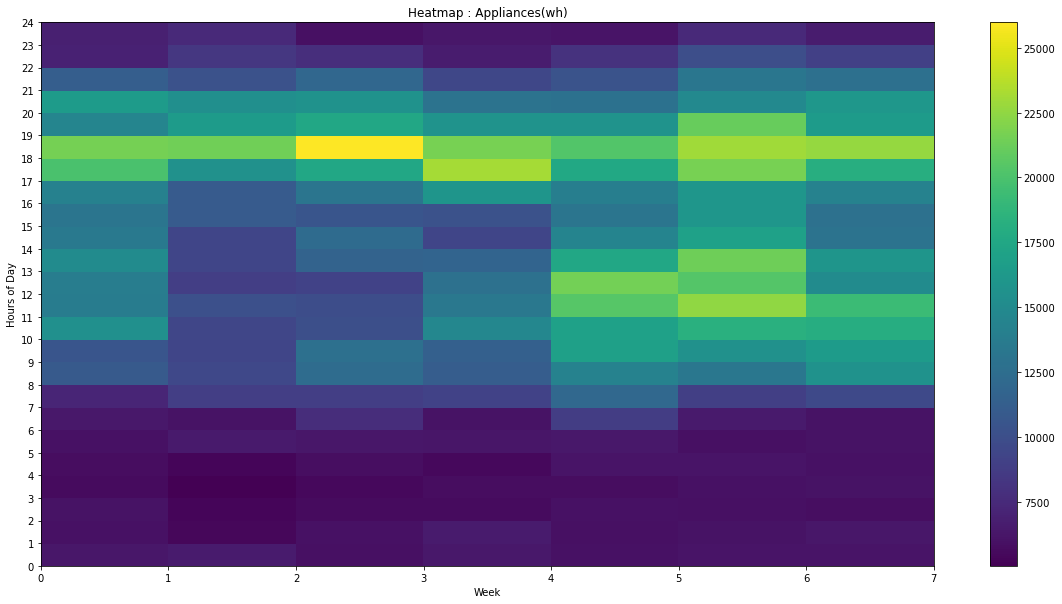

In [20]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()


<AxesSubplot:>

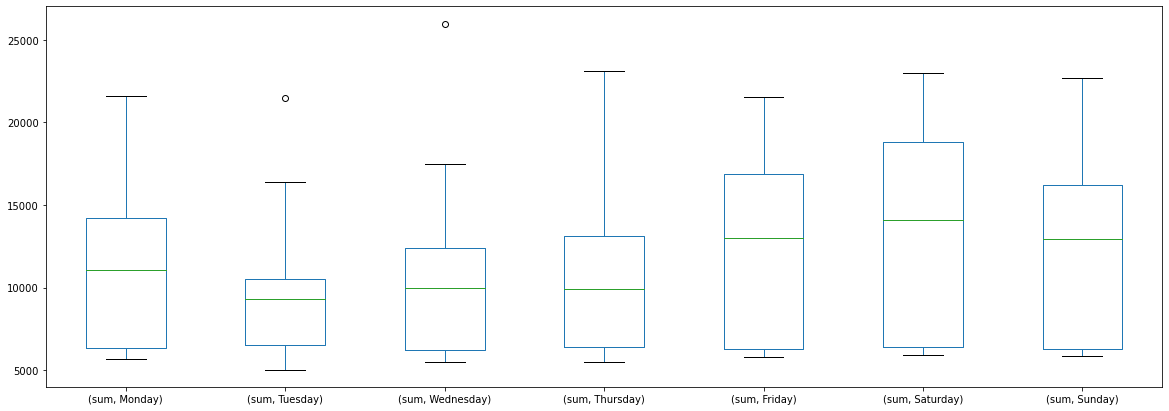

In [21]:
table.plot.box(figsize=(20, 7))

In [22]:
#Weekends are observed to have high values of energy.This explains the outliers in appliances. 
# hence removing these outliers will not give any benifit to us as these are weekend effects

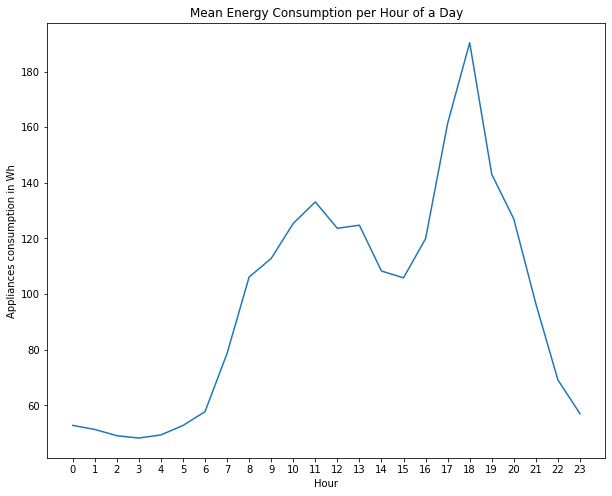

In [23]:
# Plot of Mean Energy Consumption per Hour of a Day

data.groupby('hours')['Appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

In [24]:
#High electricity consumption is observed during evening hours between 16:00 to 20:00
#at night hours from 23:00 to  6:00, the power load is below 50Wh which is quite obvious as most appliances at this time will be off or on standby
# between  9 to 13, consumption is > 100wh as it is breakfast and after that the consumpition is less than 100Wh.                                                                                           

C:\Users\NutanTripathy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\NutanTripathy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Appliances log(wH)')

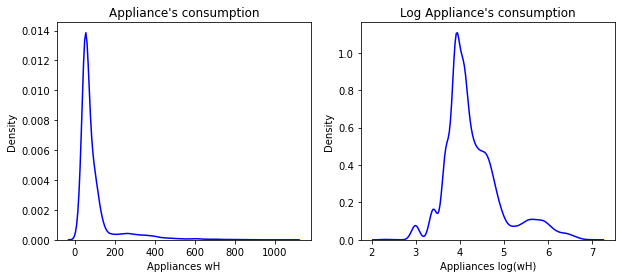

In [26]:
# now as the appliances energy consumption graph was skewed therefore i thought of logging that function so that 
# we regression models give a better fit to that. As when we take the log of the data and it becomes normalish, 
# then you can take advantage of many features of a normal distribution, like well-defined mean, standard deviation 
# (and hence z-scores), symmetry, etc. 

f, axes = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(data["Appliances"],hist = False, color = 'blue',ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(data["log_appliances"],hist = False, color = 'blue',ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

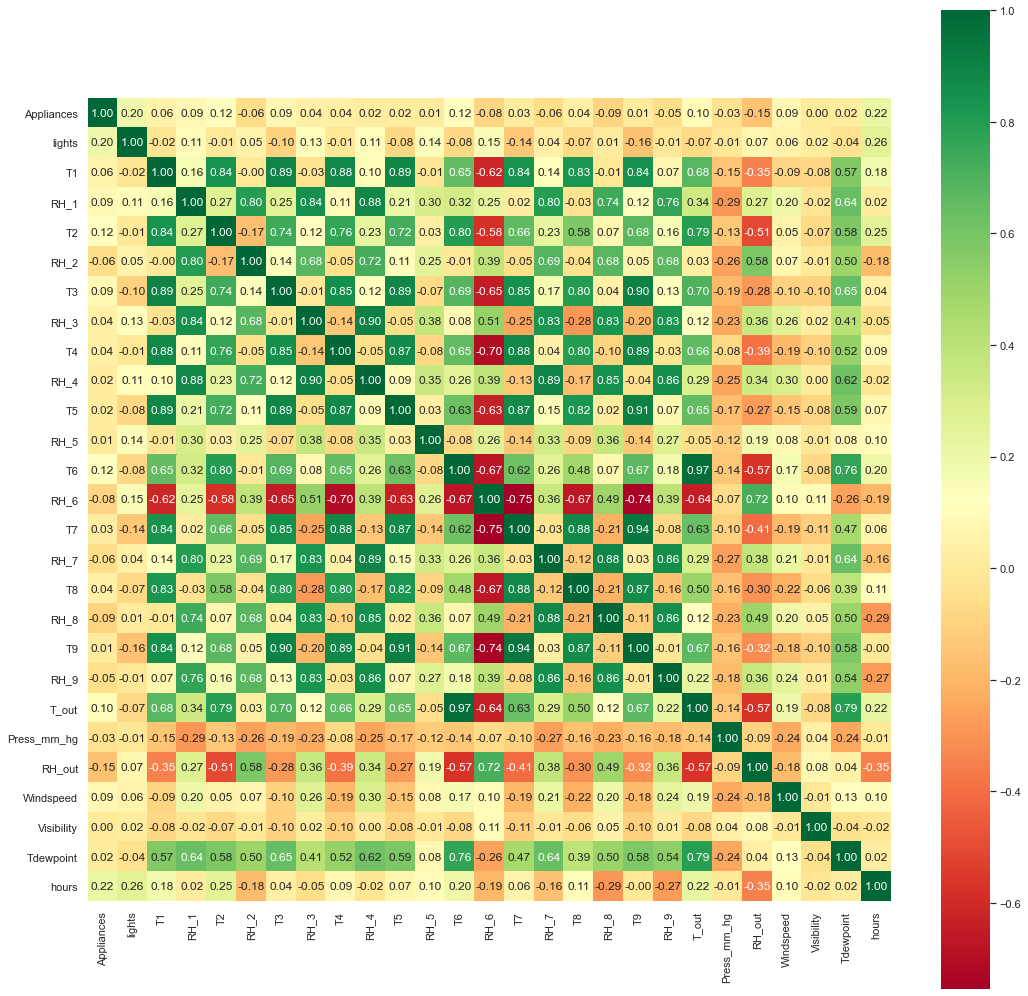

In [27]:
# Correlation among the variables
col = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hours']
corr = data[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [25]:
#The energy consumpyion is highly correlated with
# Hours : 0.22
# Lights : 0.20
# T2 : 0.12
# T6 : 0.12

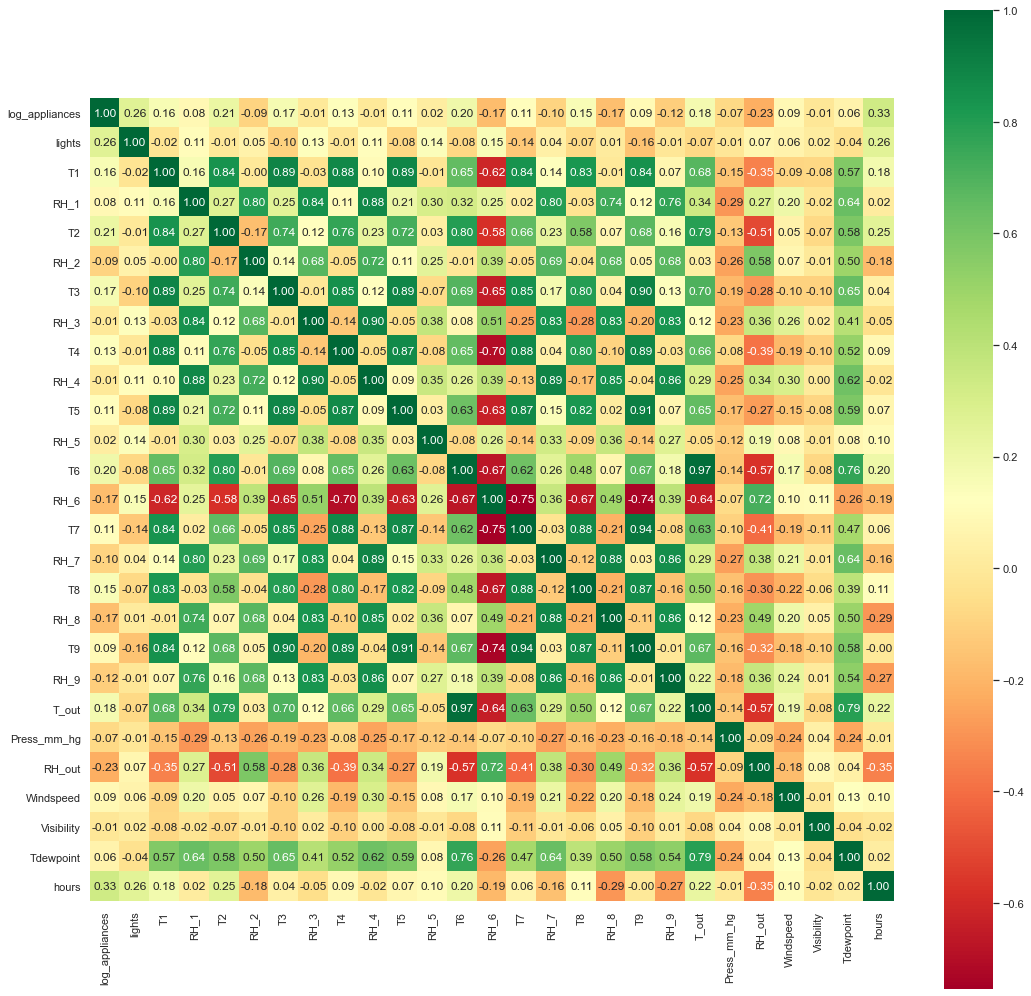

In [29]:
# Correlation among the variables while considering log Appliances
col = ['log_appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint','hours']
corr = data[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [30]:
#The energy consumpyion is highly correlated with
# Hours : 0.33
# Lights : 0.26
# T2 : 0.21
# T6 : 0.10

# this graph shows that independent variables are more closely related to log appliances 

In [ ]:
# Now we will try to do some feature selectrion process for our dataset if we could find any
# before that we will do the splitting of the data into test and training set

In [38]:
# Creation of train/test sets
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train, test = train_test_split(data,test_size=0.25,random_state=40)

In [48]:
# Combining all the data and seegregating like columns together
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] \

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

# col_target1 = ["log_appliances"]
# Seperate dependent and independent variables 

# feature_vars1 = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
# target_vars1 = train[col_target]

In [49]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [50]:
#As we can see that 75% of lights counts to 0. Therefore taking its proper information is necessary
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [51]:
# Due to lot of zero enteries this column is of not much use 
feature_vars.drop("lights", axis=1, inplace=True);

C:\Users\NutanTripathy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
feature_vars.head(2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,rv1,rv2
9544,22.6,19.5,21.50,22.89,19.166667,2.863333,21.0,22.89,19.89,34.70,...,38.5,37.26,2.233333,0.4,87.666667,764.200000,1.333333,61.000000,43.195492,43.195492
19366,23.7,21.0,25.39,23.60,19.890000,5.500000,23.0,24.20,22.60,40.29,...,43.4,44.59,6.266667,5.3,93.666667,757.233333,1.000000,25.333333,46.369677,46.369677


<ipython-input-53-994b18ac67e3>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


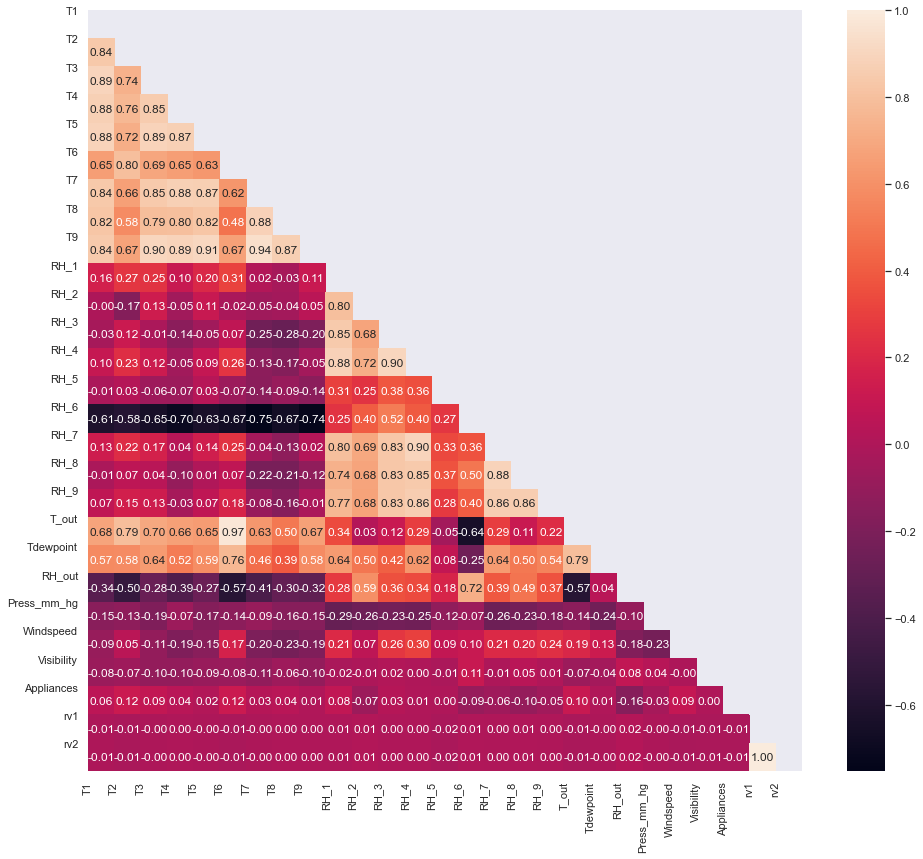

In [53]:
# Use the weather , temperature , applainces and random column to see the correlation so that we can see if 
# we can remove some other variable also

train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [36]:
#the conclusions from above are:-
# All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances .
# There is a high degree of correlation between T9 and T3,T5,T7,T8 
# also T6 & T_Out has high correlation(0.97)(both temperatures from outside) . 
# Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.
# Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values
# Random variables have no role to play

In [54]:
#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [55]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [56]:
#As a result of feature selection and 
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","T6","T9"],axis=1 , inplace=True)
# Due to conlusion made above below columns are removed
test_X.drop(["rv1","rv2","Visibility","T6","T9"], axis=1, inplace=True)

C:\Users\NutanTripathy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
train_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [58]:
test_X.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'RH_1', 'RH_2', 'RH_3',
       'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9', 'T_out', 'Tdewpoint',
       'RH_out', 'Press_mm_hg', 'Windspeed'],
      dtype='object')

In [59]:
#Scaling the concerned data
# Variables that are measured at different scales do not contribute equally to the model fitting & model learned function
# and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) 
# is usually used prior to model fitting.

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]


test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [60]:
sc_train.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,...,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,...,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,...,-0.676999,0.311400,0.163327,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,...,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,...,1.453771,3.043131,2.777725,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,-0.464759


In [61]:
sc_test.head()

,T1,T2,T3,T4,T5,T7,T8,RH_1,RH_2,RH_3,...,RH_6,RH_7,RH_8,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.409392,-0.946375,-0.352449,-0.426736,0.306431,...,1.086122,-0.407472,-0.731388,-0.437093,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.811654,1.049857,0.671740,1.084770,-0.220306,...,-1.056634,-0.276865,-0.989635,-0.554766,0.865496,0.485626,-0.967649,-0.401660,0.004891,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-0.600348,-0.929458,-0.182731,0.160016,0.427270,...,0.869462,0.702690,0.538598,0.705174,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,1.502863,1.400044,-0.419664,-0.511502,-0.885589,...,-1.365905,-0.346975,-0.678579,-1.043214,0.591690,0.568755,-0.323430,0.701622,-1.216158,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.270881,0.339334,-0.797748,-0.320955,-1.037265,...,0.039148,-1.025548,-1.028276,-1.198139,-0.307513,-0.001268,0.524227,0.917775,0.004891,0.224334


In [68]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [ ]:
# Trying out 4 Regression models:
# 1. LinearRegression
# 2. SVR
# 3. RandomForestRegressor
# 4. XG Boost 

In [69]:
# Starting of modelling for the data
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(train_X,train_y)

LinearRegression()

In [70]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(train_X,train_y)

SVR()

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [72]:
import xgboost as xgb
from xgboost import plot_importance
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [73]:
# metrics we are using
# 1- mape = mean absolute percentage error
# Mean absolute percentage error is commonly used as a loss function for regression problems and in model evaluation,
# because of its very intuitive interpretation in terms of relative error.
# MAPE = (1 / sample size) x ∑[( |actual - forecast| ) / |actual| ] x 100
# Accuracy will hence be  = 100 - MAPE


# 2- r2 Score = R2 score is used to evaluate the performance of a linear regression model. 
# It is the amount of the variation in the output dependent attribute which is predictable from the input 
# independent variable(s). It is used to check how well-observed results are reproduced by the model, 
# depending on the ratio of total deviation of results described by the model.
# Mathematical formula - R2= 1- SSres / SStot
# Where,
# SSres is the sum of squares of the residual errors.
# SStot is the total sum of the errors.

In [75]:

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error: {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print("Accuracy :{}%\n".format(accuracy))

In [76]:
evaluate(lin_model, test_X, test_y)
evaluate(svr_model, test_X, test_y)
evaluate(rf_model, test_X, test_y)
evaluate(model_xgb, test_X, test_y)

LinearRegression() 

Average Error: 0.5300 degrees
Variance score R^2  : 12.14%
Accuracy :97.03498274501358%

SVR() 

Average Error: 0.3682 degrees
Variance score R^2  : 20.99%
Accuracy :79.47208881052241%

RandomForestRegressor(random_state=1) 

Average Error: 0.3131 degrees
Variance score R^2  : 55.78%
Accuracy :75.88849149385712%

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 

Average Error: 0.3760 degrees
Va

In [ ]:
#Now for fine tuning we will use cross Validation Technique

In [77]:
#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
from sklearn.model_selection import TimeSeriesSplit

cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, train_X, train_y, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, train_X, train_y, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, train_X, train_y, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, train_X, train_y, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random Forest Model:')
scores = cross_val_score(rf_model, train_X, train_y, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, train_X, train_y, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('XGBRegressor Model:')
scores = cross_val_score(model_xgb, train_X, train_y, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_xgb, train_X, train_y, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))


Linear Model:
Accuracy: 99.47 (+/- 0.04) degrees
R^2: 0.13 (+/- 0.04) degrees
SVR Model:
Accuracy: 99.62 (+/- 0.07) degrees
R^2: 0.18 (+/- 0.09) degrees
Random Forest Model:
Accuracy: 99.62 (+/- 0.11) degrees
R^2: 0.41 (+/- 0.18) degrees
XGBRegressor Model:
Accuracy: 99.59 (+/- 0.10) degrees
R^2: 0.34 (+/- 0.19) degrees


In [78]:
# Model performance on test data
y1_pred = lin_model.predict(test_X)
y2_pred = svr_model.predict(test_X)
y3_pred = rf_model.predict(test_X)
y5_pred = model_xgb.predict(test_X)

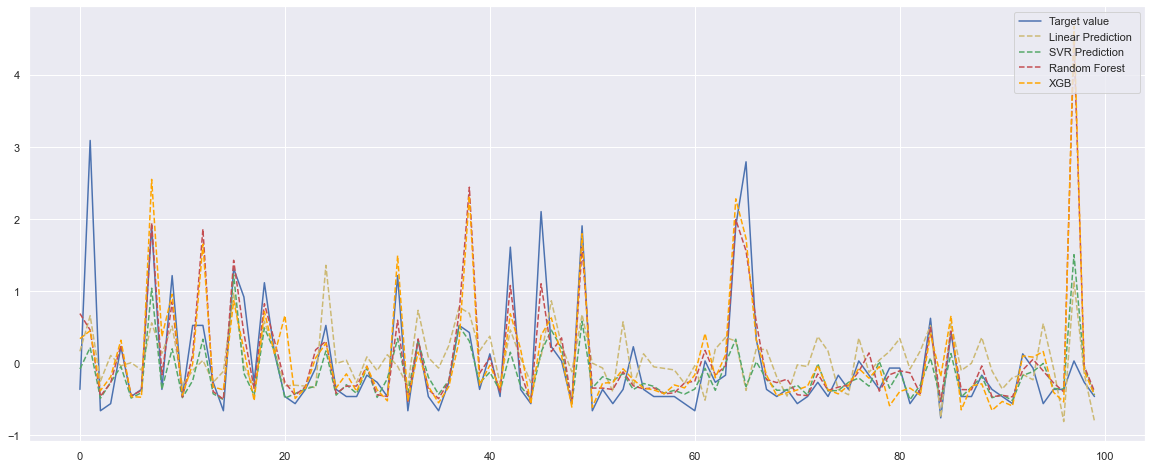

In [79]:
fig = plt.figure(figsize=(20,8))
plt.plot(test_y[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label='SVR Prediction ', linestyle='--', color='g')
plt.plot(y3_pred[:100],label='Random Forest', linestyle='--', color='r')
plt.plot(y5_pred[:100],label='XGB', linestyle='--', color='orange')

plt.legend(loc=1)

In [ ]:
Observations:-
#random Forest is best algorithm for this data set
#more improvement which can be done on it
#log of appliances can be done bcoz logging changes the skew distribution into normal distribution.So linear regression model will give a much better accuracy with logging 